# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, LeakyReLU, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [5]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [6]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [7]:
# the number of the training and testing samples


len(X_train), len(X_test)

(42000, 18000)

**Observation:**

The number of training and tesing images are 42000 and 18000 respectively.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

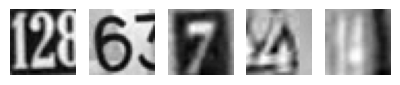

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# let's display the firsdt 5 images from the data set 
plt.figure(figsize = (10, 1))

for i in range(5):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [9]:
print("Shape:", X_train[0].shape) # Printing the shape of first image

print("First image:\n", X_train[0]) # looking at the pixels of the first image|

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [10]:

X_train = X_train.reshape(X_train.shape[0], 1024) # reshaping training images into a 1D array

X_test = X_test.reshape(X_test.shape[0], 1024)  # reshaping testing images into a 1D array

X_train.shape, X_test.shape

((42000, 1024), (18000, 1024))

In [11]:
X_train[0]

array([33.0704, 30.2601, 26.852 , ..., 49.6682, 50.853 , 53.0377],
      dtype=float32)

### **Normalize the train and the test data**

In [12]:
# normalizing the data would help our model to learn the parametrs quickly and helps us in bringing down the computation time
X_train = X_train/255.0
X_test = X_test/255.0

Print the shapes of Training and Test data

In [13]:
X_train[0].shape, X_test[0].shape

((1024,), (1024,))

In [14]:
X_train[0] # now, every pixel value is normalized to a value btw 0 and 1

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

### **One-hot encode output**

In [15]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [16]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [17]:
def nn_model_1():

    model = Sequential() 
    model.add(Flatten(input_shape = (1024,)))
    model.add(Dense(62, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
      
    
    optimizer = tf.keras.optimizers.legacy.Adam(0.001) # creating a optimizer object for flexibility to provide the learning rate

    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy']) # compiling the model
    
    return model

In [18]:
## Building the  model
model_1 = nn_model_1()

## summary of the model

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 62)                63550     
                                                                 
 dense_1 (Dense)             (None, 32)                2016      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 65,896
Trainable params: 65,896
Non-trainable params: 0
_________________________________________________________________


In [19]:
## Fitting the model


history_model_1 = model_1.fit(X_train, y_train, validation_split= 0.2, epochs =20, batch_size=128, verbose=1)

Epoch 1/20
263/263 [==============================] - 3s 8ms/step - loss: 2.2897 - accuracy: 0.1227 - val_loss: 2.2436 - val_accuracy: 0.1740
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0590 - accuracy: 0.2387 - val_loss: 1.8913 - val_accuracy: 0.3196
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8223 - accuracy: 0.3461 - val_loss: 1.7205 - val_accuracy: 0.3868
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6794 - accuracy: 0.4120 - val_loss: 1.6160 - val_accuracy: 0.4393
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5871 - accuracy: 0.4507 - val_loss: 1.5344 - val_accuracy: 0.4771
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5219 - accuracy: 0.4835 - val_loss: 1.4928 - val_accuracy: 0.4964
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4704 - accuracy: 0.5074 - val_loss: 1.4400 - val_accuracy: 0.5232
Epoch 

In [20]:
## Evaluating the model 
loss_and_metrics = model_1.evaluate(X_test, y_test)
loss_and_metrics ## Printing the loss and accuracy of the model


563/563 [==============================] - 1s 2ms/step - loss: 1.1758 - accuracy: 0.6364


[1.1757533550262451, 0.636388897895813]

model yeilds us the accuracy of 63% and a model loss of 1.1.7

In [59]:
classes = model_1.predict(X_test, batch_size=128)
classes.shape

141/141 [==============================] - 0s 2ms/step


(18000, 10)

### **Plot the Training and Validation Accuracies and write down your Observations.**

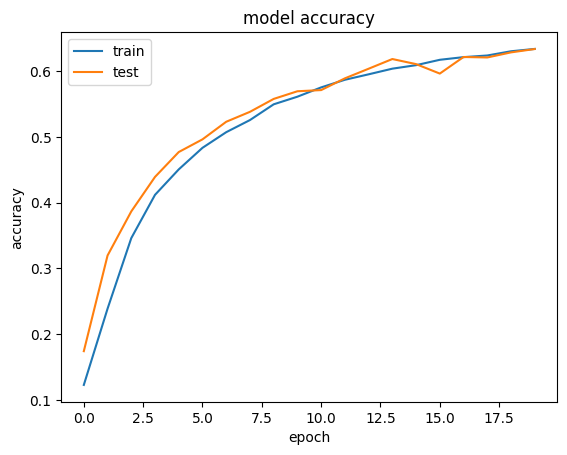

In [22]:
#summarizing hiostry for Accuracy
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

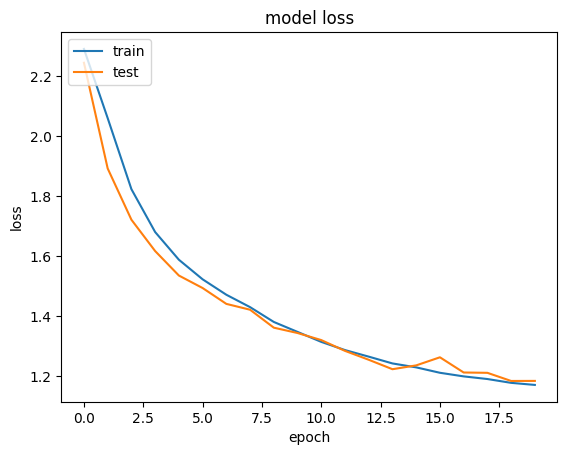

In [23]:
#summarizing hiostry for loss

plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations:**
From the plot of the accuracy, you can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs, but that's not a significant growth. You can also see that the model has not yet over-learned the training dataset, showing comparable results on both datasets..


From the plot of the loss, we can see that the loss for testing is almost same as that of training.

From above plots we can say that the model has no significant improvement with the existing parameters after 15 epochs.


Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [24]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [25]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [26]:
# Defining the model

def nn_model_2():

    model = Sequential()  
    
    # Add layers as per the architecture mentioned above in the same sequence
    
    model.add((Flatten(input_shape = (1024,)))) ## adding flatten layer at the beginning, since ANN require data in 1D 

    model.add(Dense(256, activation = 'relu'))

    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(.2))

    model.add(Dense(64, activation = 'relu'))

    model.add(Dense(64, activation = 'relu'))

    model.add(Dense(32, activation = 'relu'))

    model.add(BatchNormalization(synchronized=True))

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model
    optimizer = tf.keras.optimizers.legacy.Adam(0.0005)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    
    return model

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [27]:
model_2 = nn_model_2()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

this model has 64 non-trainable parameters

In [28]:
history_model_2 = model_2.fit(X_train, y_train, validation_split= 0.2, epochs =30, batch_size=128, verbose=1)

Epoch 1/30
263/263 [==============================] - 5s 14ms/step - loss: 2.3265 - accuracy: 0.1014 - val_loss: 2.3046 - val_accuracy: 0.1008
Epoch 2/30
263/263 [==============================] - 3s 12ms/step - loss: 2.2235 - accuracy: 0.1466 - val_loss: 2.1167 - val_accuracy: 0.2189
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 1.7290 - accuracy: 0.3885 - val_loss: 1.5462 - val_accuracy: 0.5314
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.3757 - accuracy: 0.5406 - val_loss: 1.2332 - val_accuracy: 0.5964
Epoch 5/30
263/263 [==============================] - 4s 16ms/step - loss: 1.2412 - accuracy: 0.5929 - val_loss: 1.1096 - val_accuracy: 0.6399
Epoch 6/30
263/263 [==============================] - 5s 21ms/step - loss: 1.1643 - accuracy: 0.6212 - val_loss: 1.1201 - val_accuracy: 0.6283
Epoch 7/30
263/263 [==============================] - 4s 16ms/step - loss: 1.1079 - accuracy: 0.6431 - val_loss: 1.1081 - val_accuracy: 0.6429


In [29]:
## The accuracy seems a bit higher for this model compared to the earlier one. 


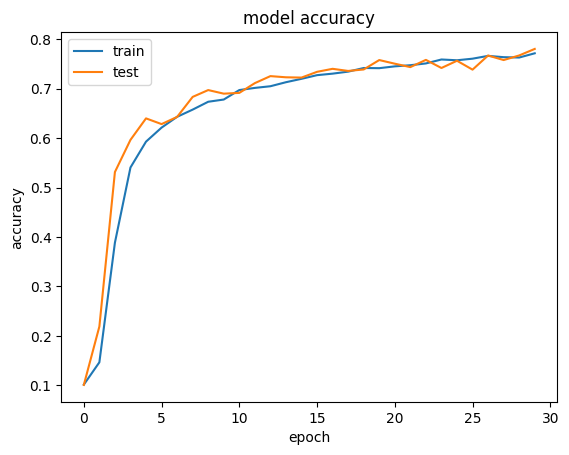

In [30]:
#plotting model accuracy
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

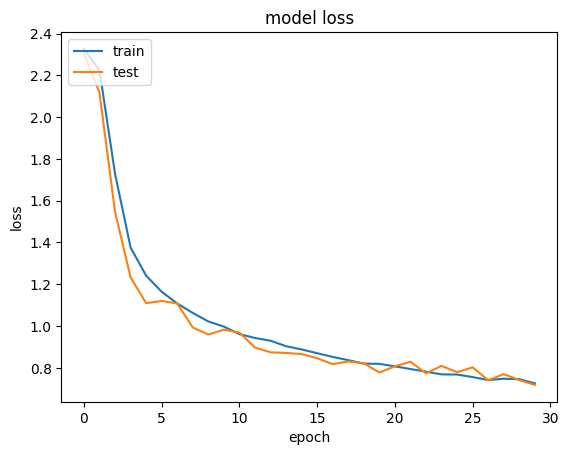

In [31]:
# plotting model loss

plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations:**
From model accuracy plot we can see that testing performance is trying to mimic or in otherwords capture the training data well as number of epochs are incresing.

From the loss plot(Model loss) we can see that training loss is consistenlty decreasing whereas the test loss is also decresing but not consistent as compared to the training loss.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [32]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [33]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1814
           1       0.81      0.80      0.80      1828
           2       0.83      0.78      0.80      1803
           3       0.74      0.73      0.73      1719
           4       0.75      0.85      0.80      1812
           5       0.75      0.75      0.75      1768
           6       0.73      0.79      0.76      1832
           7       0.85      0.77      0.81      1808
           8       0.72      0.74      0.73      1812
           9       0.79      0.75      0.77      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



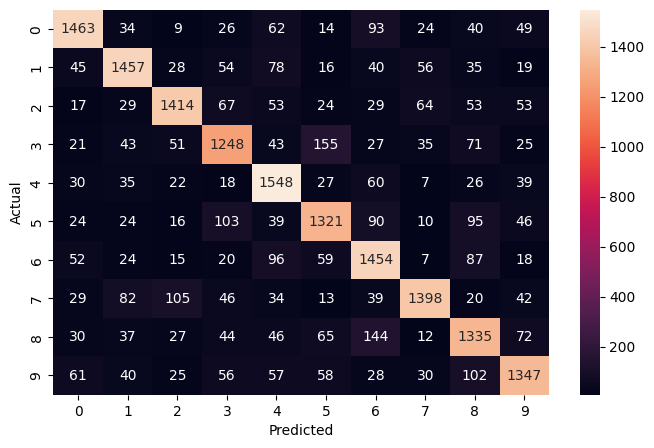

In [34]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm =  confusion_matrix(y_test, test_pred) # the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
From the above confusion matrix we can see that digits 1 followed by 4 and 2 are most corectly classified, on the flipside digits 3, 5, 9, 7  were poorly classified because of it's structural complexity.

Comparing both of the above build models, we can say that, first model was not performing well whereas the second model has slightly better performance in terms of both accuracy and loss compared to the first model

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [35]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Closing the file

h5f.close()

Check the number of images in the training and the testing dataset.

In [36]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [37]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [38]:
# Reshaping the dataset to be able to pass them to CNNs. 

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [39]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [40]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [41]:
# one-hot encoding the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
We can see from above that each record of the target variable is now one-hot encoded instead of a single label

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [42]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [43]:
# Define the model

def cnn_model_1():

    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, (3, 3)))

    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Dense(10, activation = 'softmax'))
    
    # Compile the model
    optimizer = tf.keras.optimizers.legacy.Adam(0.001)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    
    return model

In [44]:
# Building the model

cnn_model_1 = cnn_model_1()

# Printing the model summary

cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                      

In [45]:
# Fitting the model

history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split= 0.2, epochs =20, batch_size=32, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 67s 63ms/step - loss: 1.0579 - accuracy: 0.6631 - val_loss: 0.6603 - val_accuracy: 0.8107
Epoch 2/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.5711 - accuracy: 0.8369 - val_loss: 0.5597 - val_accuracy: 0.8419
Epoch 3/20
1050/1050 [==============================] - 64s 61ms/step - loss: 0.4838 - accuracy: 0.8600 - val_loss: 0.5363 - val_accuracy: 0.8476
Epoch 4/20
1050/1050 [==============================] - 63s 60ms/step - loss: 0.4249 - accuracy: 0.8772 - val_loss: 0.4691 - val_accuracy: 0.8698
Epoch 5/20
1050/1050 [==============================] - 66s 63ms/step - loss: 0.3800 - accuracy: 0.8872 - val_loss: 0.4691 - val_accuracy: 0.8669
Epoch 6/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.3425 - accuracy: 0.8960 - val_loss: 0.4641 - val_accuracy: 0.8677
Epoch 7/20
1050/1050 [==============================] - 66s 63ms/step - loss: 0.3100 - accuracy: 0.9075 - val_loss: 0.4553 -

### **Plot the Training and Validation Accuracies and Write your observations.**

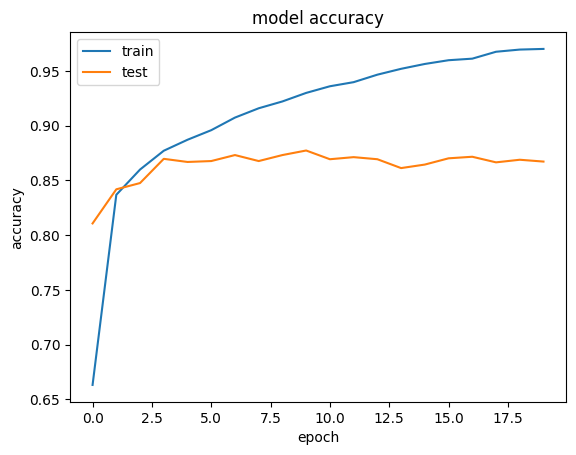

In [46]:
## plot for model accuracy
plt.plot(history_cnn_model_1.history['accuracy'])
plt.plot(history_cnn_model_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

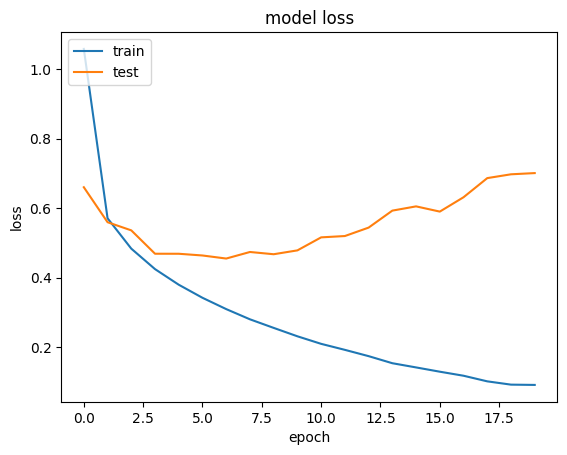

In [47]:
# Plotting model loss
plt.plot(history_cnn_model_1.history['loss'])                       
plt.plot(history_cnn_model_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations:**

From the above two plots, we can see that model accuracy and model loss looks good for training data, but it's not the good or expected results that we are seeing here for testing data, with that being said, we can say that the CNN is not yeilding us the good results.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [48]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [49]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [50]:
# Define the model

def cnn_model_2():
    
    model = Sequential()
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1))) 

    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, (3, 3), activation='relu'))

    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D((2, 2)))

    model.add(BatchNormalization(synchronized=True))

    model.add(Conv2D(32, (3, 3)))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(64, (3, 3)))

    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D((2, 2)))

    model.add(BatchNormalization(synchronized=True))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Dropout(.5))

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model
    optimizer = tf.keras.optimizers.legacy.Adam(0.001)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    
    return model






In [51]:
# Building the model

cnn_model_2 = cnn_model_2()

In [52]:
# Printing the summary

cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                          

In [53]:
# Fitting the model

history_cnn_model_2 =cnn_model_2.fit( X_train, y_train, validation_split= 0.2, epochs =30, batch_size=128, verbose=1)

Epoch 1/30
263/263 [==============================] - 94s 350ms/step - loss: 1.1907 - accuracy: 0.6165 - val_loss: 1.7841 - val_accuracy: 0.5479
Epoch 2/30
263/263 [==============================] - 91s 347ms/step - loss: 0.6716 - accuracy: 0.7956 - val_loss: 0.6189 - val_accuracy: 0.8524
Epoch 3/30
263/263 [==============================] - 90s 342ms/step - loss: 0.5592 - accuracy: 0.8327 - val_loss: 0.5730 - val_accuracy: 0.8314
Epoch 4/30
263/263 [==============================] - 92s 348ms/step - loss: 0.5003 - accuracy: 0.8499 - val_loss: 0.4256 - val_accuracy: 0.8752
Epoch 5/30
263/263 [==============================] - 92s 351ms/step - loss: 0.4442 - accuracy: 0.8647 - val_loss: 0.3971 - val_accuracy: 0.8864
Epoch 6/30
263/263 [==============================] - 94s 359ms/step - loss: 0.4175 - accuracy: 0.8737 - val_loss: 0.3729 - val_accuracy: 0.8942
Epoch 7/30
263/263 [==============================] - 93s 355ms/step - loss: 0.3930 - accuracy: 0.8819 - val_loss: 0.4211 - val_ac

### **Plot the Training and Validation accuracies and write your observations.**

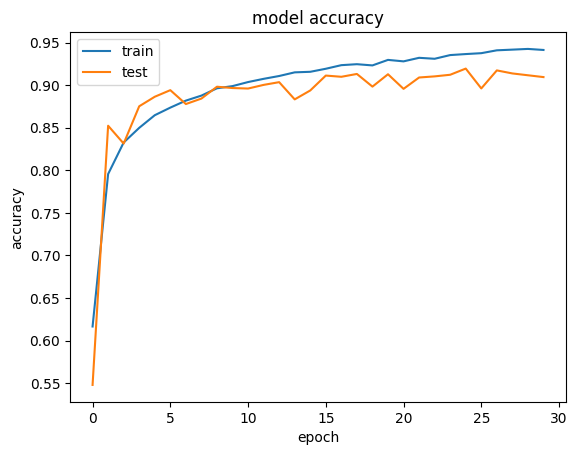

In [54]:

plt.plot(history_cnn_model_2.history['accuracy'])
plt.plot(history_cnn_model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

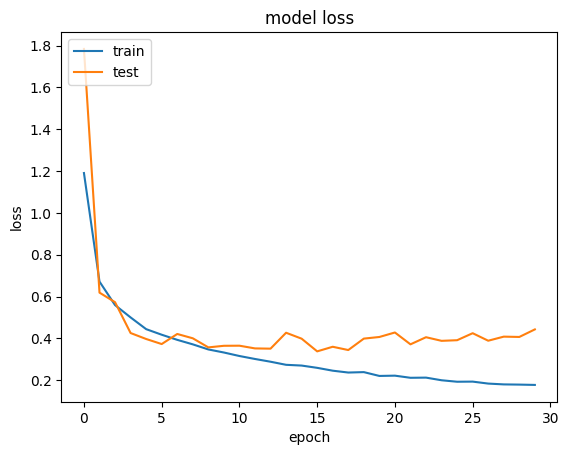

In [55]:
plt.plot(history_cnn_model_2.history['loss'])
plt.plot(history_cnn_model_2    .history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations:**

From the accuracy plot above, it's obvious that model has reached the saturation point after 2 epochs, there is no significant improvement after 2 epochs.

From the model loss plot, we can see that as the number of epochs were increasing, the model's loss is gradually decresing.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [56]:
# Make prediction on the test data using model_2 

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)


563/563 [==============================] - 13s 22ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

In [ ]:
## Potting Confusion matix
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**


1.   Compared to the ANN, CNN's performance is better, CNN has low misclassification rate. CNN holds accuracy of 92% where as the ANN has 66%. 

2. CNN classiefied almost every digit correctly, unlike ANN where it's able to classify few digits correctly, but miscalssified complex structured digits


3. The amount of time to train CNN is pretty high compared to that 0f ANN. it is due to it's complex structure.

4. In recognizing digits, CNN has better overall performace comapred to ANN.

5. The model reached it's saturation point after 3 epochs, there is no significant imporovement in accuracy after 3 epochs